# Satellite Imagery Analysis in Python

## 1. Open satellite imagery in Python 

In [1]:
#!conda install -c conda-forge matplotlib 
#!pip install matplotlib

In [2]:
import rasterio as rio
import matplotlib 

In [3]:
# Path to the image
path = "./data/small_stacked.tif"

# Open with Rasterio. Let us call it data
data = rio.open(path)

### META Data

* Coordinate Reference System (CRS)

In [4]:
data.crs

CRS.from_epsg(32633)

* width and height

In [5]:
data.width

1092

In [6]:
data.height

831

* Image Bands

In [7]:
data.count

13

* The sentinel 2 data has 13 bands. The following table shows the band name and its resolution
<img src="images/s2-bands.png" width=1600 height=1600 />


* Meta data

In [8]:
data.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 1092,
 'height': 831,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 367310.0,
        0.0, -10.0, 6163410.0)}

## 2. Reading Satellite Image bands

* Read the Red Band / Band 4
* Read the Green Band 

In [9]:
red = data.read(4)
green = data.read(3)
blue = data.read(2)

In [10]:
green

array([[ 470.,  474.,  488., ..., -999., -999., -999.],
       [ 468.,  483.,  482., ..., -999., -999., -999.],
       [ 473.,  481.,  481., ..., -999., -999., -999.],
       ...,
       [1491., 1242., 1061., ..., 1327., 1408., 1631.],
       [1520., 1600., 1460., ..., 1571., 1554., 1668.],
       [ 970., 1215., 1366., ..., 1631., 1652., 1696.]], dtype=float32)

### Statistical Values of the Image

* Mean Pixel Value

In [11]:
red.mean()

952.64935

In [12]:
green.mean()

1027.1161

* The image size (Width and Height)

We can also print out the shape of the image when we read the band. 

In [13]:
red.shape

(831, 1092)

In [14]:
red.shape[1]

1092

### Reading All Bands

In [15]:
all_bands = data.read()

In [16]:
all_bands.shape

(13, 831, 1092)

## 3. Visualize Images

In [17]:
from rasterio.plot import show

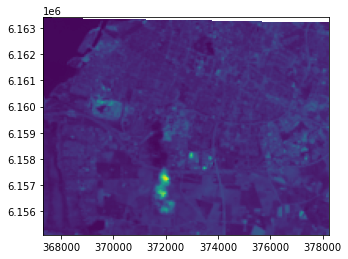

In [18]:
show(data)

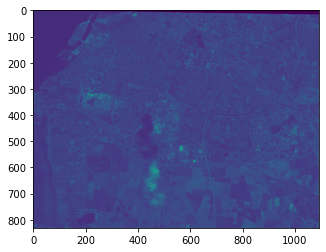

In [19]:
show(red)

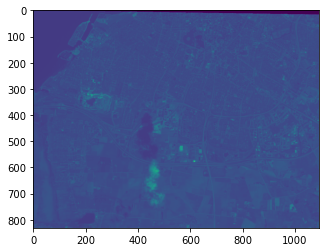

In [20]:
show(green)

### Increasing Plot size

In [21]:
import matplotlib.pyplot as plt

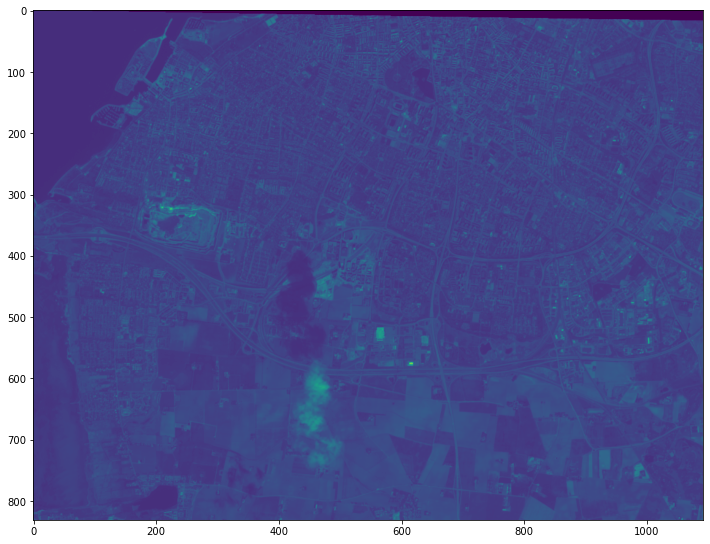

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
show(red, ax = ax)

### Change Colors

* https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

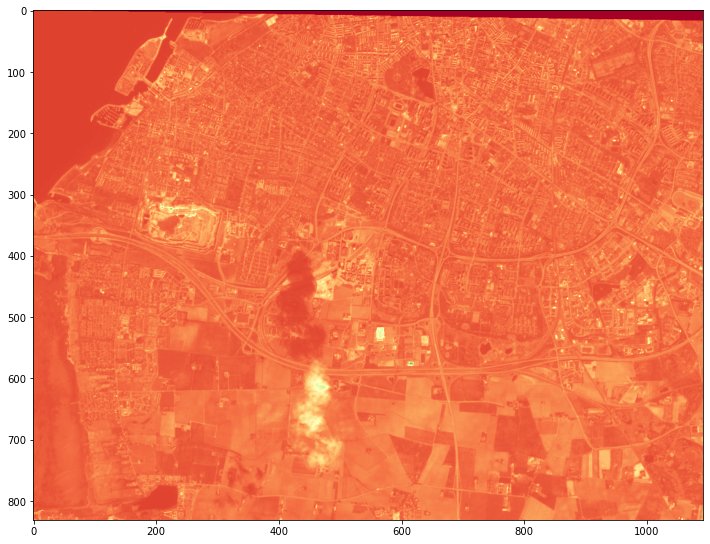

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
show(red, cmap = "RdYlGn", ax = ax)

## 4. Numpy Array Manipulations

In [24]:
#Call red band (Arrays)
red

array([[ 261.,  262.,  263., ..., -999., -999., -999.],
       [ 274.,  265.,  267., ..., -999., -999., -999.],
       [ 280.,  271.,  270., ..., -999., -999., -999.],
       ...,
       [1616., 1249.,  949., ..., 1535., 1597., 1857.],
       [1519., 1691., 1609., ..., 1804., 1835., 1961.],
       [ 890., 1219., 1298., ..., 1973., 1959., 2027.]], dtype=float32)

In [25]:
# Red band shape
red.shape

(831, 1092)

In [26]:
# Call all band image arrays
all_bands

array([[[1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        ...,
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.]],

       [[ 775.,  784.,  782., ..., -999., -999., -999.],
        [ 782.,  784.,  785., ..., -999., -999., -999.],
        [ 784.,  797.,  792., ..., -999., -999., -999.],
        ...,
        [1553., 1274., 1082., ..., 1428., 1447., 1600.],
        [1648., 1734., 1611., ..., 1565., 1571., 1621.],
        [1057., 1253., 1451., ..., 1583., 1606., 1657.]],

       [[ 470.,  474.,  488., ..., -999., -999., -999.],
        [ 468.,  483.,  482., ..., -999., -999., -999.],
        [ 473.,  481.,  481., ..., -999., -999., -999.],
        ...,
        [1491., 1242., 1061., ..., 1327., 1408., 1631.],
        [1520., 1600., 1460., ..., 1571., 155

In [27]:
# Call image_allbands shape
all_bands.shape

(13, 831, 1092)

### Create subset Images with Indexes

In [28]:
# Row indexes

red[200:600]

array([[ 262.,  258.,  259., ..., 1299., 1243., 1100.],
       [ 260.,  260.,  254., ..., 1202., 1142., 1048.],
       [ 266.,  259.,  251., ..., 1102.,  984.,  860.],
       ...,
       [ 589.,  641.,  719., ..., 1410., 1063.,  957.],
       [ 587.,  630.,  681., ..., 1381., 1235.,  968.],
       [ 613.,  600.,  618., ..., 1259., 1304., 1025.]], dtype=float32)

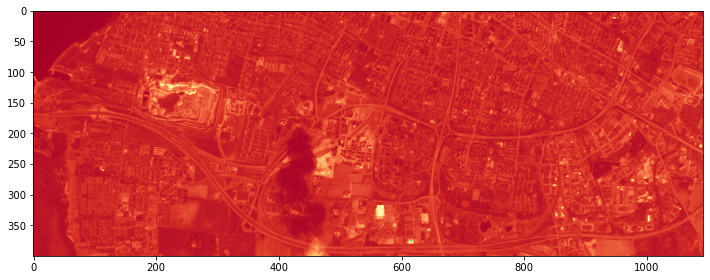

In [29]:
# Visualize row indexing
fig, ax = plt.subplots(figsize=(12,10))
show(red[200:600], cmap = "RdYlGn", ax = ax)

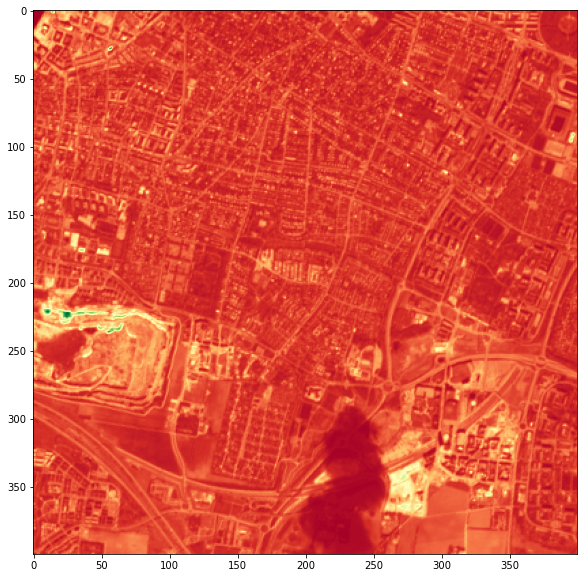

In [30]:
# Visualize row & column indexing
fig, ax = plt.subplots(figsize=(12,10))
show(red[100:500, 200:600], cmap = "RdYlGn", ax = ax)

## 5. Clipping Images to Boundaries

### Read Vector Data

In [31]:
# Import geopandas 
import geopandas as gpd

In [32]:
# Read Vector Data
urban = gpd.read_file("./data/vector/urban.shp")

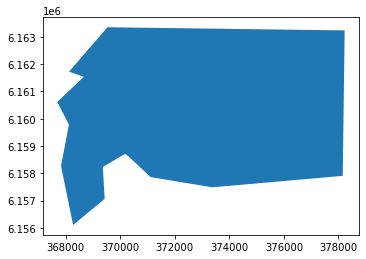

In [59]:
# Plot vector data
urban.plot()

### Mask the Data

In [61]:
# import mask
from rasterio.mask import mask

In [63]:
# Create masked and transform 
clipped_image, image_transform = mask(data, urban.geometry, crop = True)

In [64]:
# Copy the meta
image_meta = data.meta.copy()
image_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 1092,
 'height': 831,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 367310.0,
        0.0, -10.0, 6163410.0)}

In [65]:
# Check image shape
clipped_image.shape

(13, 725, 1054)

In [66]:
# Updata the meta

image_meta.update({
 'width': clipped_image.shape[1],
 'height': clipped_image.shape[2],
 'transform': image_transform
})

### Read Masked Image and Visualize

In [67]:
# Create an empty Image and write to the clipped image
rio.open("clipped.tif", "w", **image_meta).write(clipped_image)

In [68]:
# Read clipped image from the output folder
urban_image = rio.open("clipped.tif")

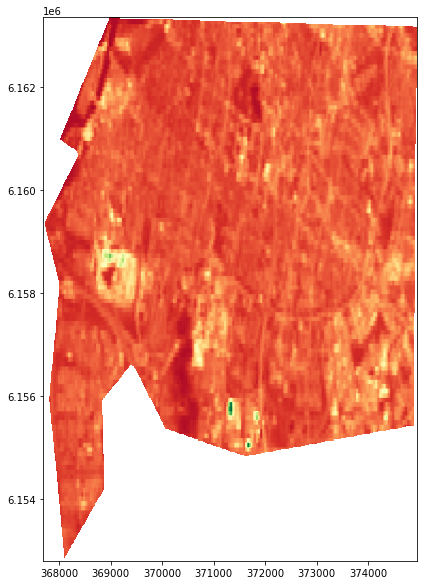

In [69]:
# Visualize the clipped image
fig, ax = plt.subplots(figsize=(12,10))
show(urban_image, cmap = "RdYlGn", ax = ax)

## 6. Create Vegetation Index

### Open Original JP2 Sentinel Images

In [70]:
# Open the original image of band 4
path = "./data/original/"
b4 = rio.open(path + "/T33UUB_20200421T102021_B04.jp2")

In [71]:
# Open the original image of band 8
b8 = rio.open(path + "/T33UUB_20200421T102021_B08.jp2")

In [72]:
# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

### Calcualte NDVI

In [73]:
# Calculate ndvi
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

In [74]:
ndvi[:10]

array([[[-0.3433584 , -0.31414868, -0.30935252, ...,  0.09165278,
          0.37263995,  0.51821324],
        [-0.30243902, -0.31695332, -0.3202934 , ...,  0.206     ,
          0.40412529,  0.53138528],
        [-0.29638554, -0.3101737 , -0.31358025, ...,  0.37397119,
          0.40713963,  0.53918582],
        ...,
        [ 0.08443198,  0.08608161,  0.07961604, ..., -0.36363636,
         -0.35120643, -0.33850129],
        [ 0.08843537,  0.07990996,  0.09131905, ..., -0.31914894,
         -0.32460733, -0.38829787],
        [ 0.0902069 ,  0.0839779 ,  0.08382394, ..., -0.33333333,
         -0.27937337, -0.33512064]]])

### Visualize NDVI

In [75]:
# Call ndvi.shape
ndvi.shape

(1, 10980, 10980)

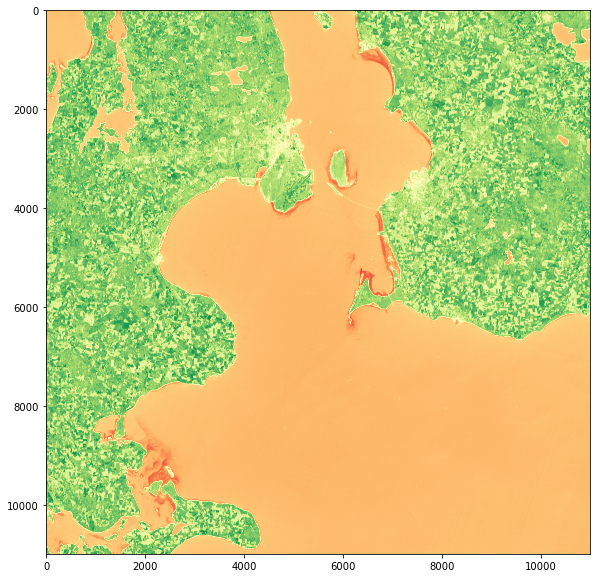

In [76]:
# Visualize a subset
fig, ax = plt.subplots(figsize=(12,10))
show(ndvi, cmap = "RdYlGn", ax = ax)

### Write NDVI to an Image

In [81]:
# Write  an NDVI image 
with rio.open(
    "ndvi.tiff", "w",
    driver = "Gtiff",
    width = b4.width,
    height = b4.height,
    count = 1,
    crs = b4.crs,
    transform = b4.transform,
    dtype = "float64"
    ) as im:
    im.write(ndvi)

## 7. Derive Statistics.

In [82]:
# Read Grid Data
grid = gpd.read_file("./data/vector/grid.shp")
grid.head()

id      left        top     right     bottom  \
0  1.0  300000.0  6200040.0  310000.0  6190040.0   
1  2.0  300000.0  6190040.0  310000.0  6180040.0   
2  3.0  300000.0  6180040.0  310000.0  6170040.0   
3  4.0  300000.0  6170040.0  310000.0  6160040.0   
4  5.0  300000.0  6160040.0  310000.0  6150040.0   

                                            geometry  
0  POLYGON ((300000.000 6200040.000, 310000.000 6...  
1  POLYGON ((300000.000 6190040.000, 310000.000 6...  
2  POLYGON ((300000.000 6180040.000, 310000.000 6...  
3  POLYGON ((300000.000 6170040.000, 310000.000 6...  
4  POLYGON ((300000.000 6160040.000, 310000.000 6...

In [83]:
# Read NDVI 
ndvi_image = rio.open("ndvi.tiff")

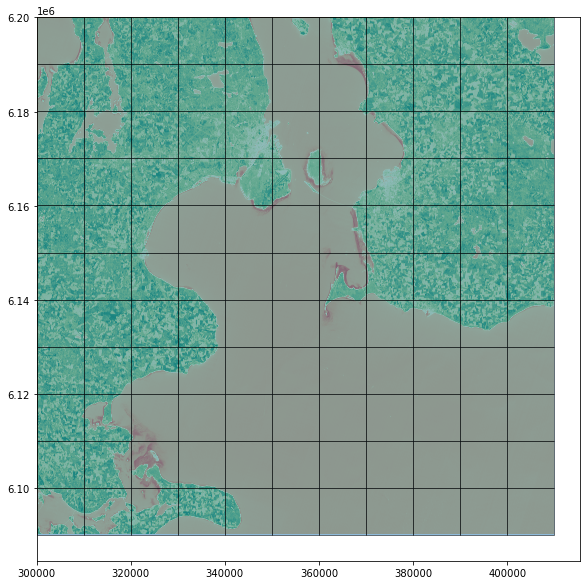

In [86]:
# Plot Both Grid data and NDVI
fig, ax = plt.subplots(figsize=(12,10))
show(ndvi_image, cmap = "RdYlGn", ax = ax)
grid.plot(ax = ax, edgecolor = "black", alpha = .50)

In [101]:
# Create a funciton to derive stats

def derive_stats(geom, data = ndvi_image):
    masked, _ = mask(dataset = data, shapes = (geom, ), crop = True, all_touched = True, filled = True)
    return mask

def derive_stats(geom, data=ndvi_image, **mask_kw):
    masked, mask_transform = mask(dataset=data, 
          shapes=(geom, ), crop=True, all_touched=True, filled=True)
    return masked

In [102]:
grid.head()

id      left        top     right     bottom  \
0  1.0  300000.0  6200040.0  310000.0  6190040.0   
1  2.0  300000.0  6190040.0  310000.0  6180040.0   
2  3.0  300000.0  6180040.0  310000.0  6170040.0   
3  4.0  300000.0  6170040.0  310000.0  6160040.0   
4  5.0  300000.0  6160040.0  310000.0  6150040.0   

                                            geometry  
0  POLYGON ((300000.000 6200040.000, 310000.000 6...  
1  POLYGON ((300000.000 6190040.000, 310000.000 6...  
2  POLYGON ((300000.000 6180040.000, 310000.000 6...  
3  POLYGON ((300000.000 6170040.000, 310000.000 6...  
4  POLYGON ((300000.000 6160040.000, 310000.000 6...

In [103]:
# Create a column for Mean
import numpy as np

grid["mean_ndvi"] = grid.geometry.apply(derive_stats).apply(np.mean)

In [104]:
# Grid head
grid.head()

id      left        top     right     bottom  \
0  1.0  300000.0  6200040.0  310000.0  6190040.0   
1  2.0  300000.0  6190040.0  310000.0  6180040.0   
2  3.0  300000.0  6180040.0  310000.0  6170040.0   
3  4.0  300000.0  6170040.0  310000.0  6160040.0   
4  5.0  300000.0  6160040.0  310000.0  6150040.0   

                                            geometry  mean_ndvi  
0  POLYGON ((300000.000 6200040.000, 310000.000 6...  -0.197401  
1  POLYGON ((300000.000 6190040.000, 310000.000 6...   0.300401  
2  POLYGON ((300000.000 6180040.000, 310000.000 6...   0.382746  
3  POLYGON ((300000.000 6170040.000, 310000.000 6...   0.490677  
4  POLYGON ((300000.000 6160040.000, 310000.000 6...   0.474978

In [105]:
# Write to file (shapefile or csv)
grid.to_file("grids_stats.shp")

## 8. Clustering

In [109]:
from sklearn.cluster import KMeans

In [110]:
band3 = data.read(3)

In [111]:
band3

array([[ 470.,  474.,  488., ..., -999., -999., -999.],
       [ 468.,  483.,  482., ..., -999., -999., -999.],
       [ 473.,  481.,  481., ..., -999., -999., -999.],
       ...,
       [1491., 1242., 1061., ..., 1327., 1408., 1631.],
       [1520., 1600., 1460., ..., 1571., 1554., 1668.],
       [ 970., 1215., 1366., ..., 1631., 1652., 1696.]], dtype=float32)

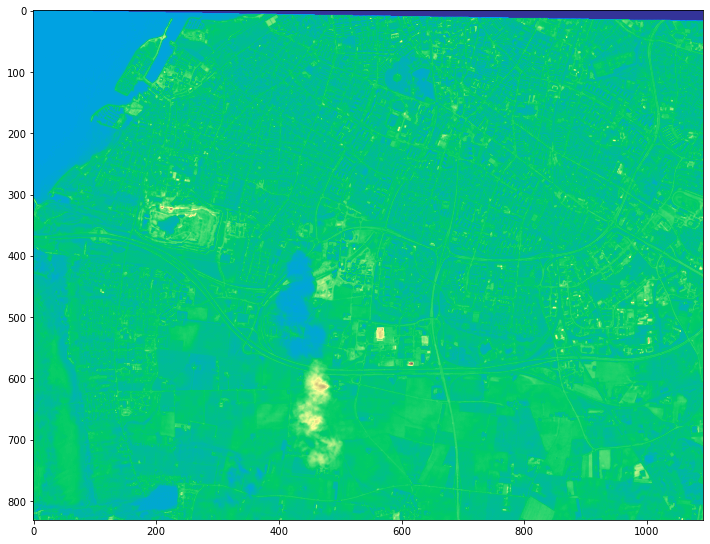

In [113]:
fig, ax = plt.subplots(figsize=(12,10))
show(band3, cmap = "terrain", ax = ax)

In [114]:
band3.shape

(831, 1092)

In [115]:
image_to_cluster = band3.reshape((-1,1))

In [116]:
image_to_cluster.shape

(907452, 1)

In [117]:
image_to_cluster

array([[ 470.],
       [ 474.],
       [ 488.],
       ...,
       [1631.],
       [1652.],
       [1696.]], dtype=float32)

In [118]:
k_means = KMeans(n_clusters = 7)

In [119]:
k_means.fit(image_to_cluster)

KMeans(n_clusters=7)

In [120]:
clusters = k_means.labels_
clusters

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [121]:
cluster_image = clusters.reshape(band3.shape)

In [122]:
cluster_image.shape

(831, 1092)

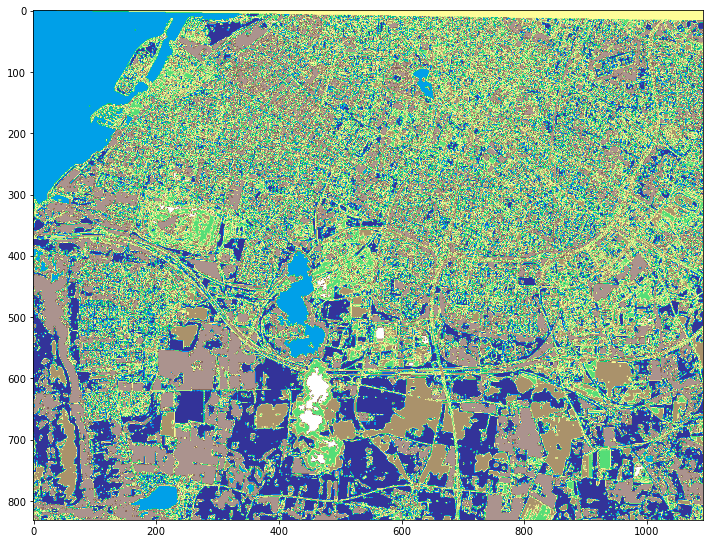

In [123]:
fig, ax = plt.subplots(figsize=(12,10))
show(cluster_image, cmap = "terrain", ax = ax)